In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df= pd.read_csv('pima-indians-diabetes.csv')

df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [44]:
features_names = ["Preg", "Glucose", "BP", "skinThick", "Insulin", "BMI", "DPF", "Age", "Class"]

df= pd.read_csv('pima-indians-diabetes.csv' , names= features_names)

df.head()


,Preg,Glucose,BP,skinThick,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
df.shape

(768, 9)

In [46]:
df.isna().sum()

Preg         0
Glucose      0
BP           0
skinThick    0
Insulin      0
BMI          0
DPF          0
Age          0
Class        0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Preg       768 non-null    int64  
 1   Glucose    768 non-null    int64  
 2   BP         768 non-null    int64  
 3   skinThick  768 non-null    int64  
 4   Insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   DPF        768 non-null    float64
 7   Age        768 non-null    int64  
 8   Class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
df['Preg'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [49]:
df['skinThick'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [50]:
df[df['skinThick']==0]

,Preg,Glucose,BP,skinThick,Insulin,BMI,DPF,Age,Class
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [51]:
df['Insulin'] = df['Insulin'].replace(to_replace=0, 
                                      value=df['Insulin'].median())
                                     
df['Insulin']



0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

In [52]:
df['Insulin'] 

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

In [53]:
df['skinThick'] = df['skinThick'].replace(to_replace=0, 
                                      value=df['skinThick'].median())
                                     
df['skinThick']

0      35
1      29
2      23
3      23
4      35
       ..
763    48
764    27
765    23
766    23
767    31
Name: skinThick, Length: 768, dtype: int64

In [57]:
X= df.drop('Class' , axis= 1)
y= df['Class']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Building a base model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC

from sklearn.metrics import accuracy_score


models= {'LogisticRegression': LogisticRegression(),
         'AdaBoostClassifier':AdaBoostClassifier(),
         'RandomForestClassifier': RandomForestClassifier(),
         'KNeighborsClassifier': KNeighborsClassifier(),
         'SVC': SVC()}

def evaluate_models(models , X_train , X_test , y_train , y_test):
    
    model_scores= {}
    
    for name , model in models.items():
        
        model.fit(X_train , y_train)
                
        model_scores[name]= model.score(X_test , y_test)
        
    return model_scores

In [68]:
model_scores= evaluate_models(models=models,
                              X_train= X_train,
                              X_test= X_test,
                              y_train= y_train,
                              y_test= y_test)


model_scores

{'LogisticRegression': 0.7532467532467533,
 'AdaBoostClassifier': 0.7467532467532467,
 'RandomForestClassifier': 0.7597402597402597,
 'KNeighborsClassifier': 0.7077922077922078,
 'SVC': 0.7467532467532467}

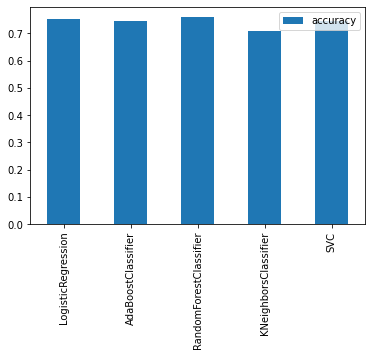

In [78]:
models_compare= pd.DataFrame(model_scores , index=['accuracy'])

models_compare.T.plot.bar();

### RandomForestClassifier seems to be the best base model.


## Hyperparameters tuning using GridSearchCV

In [75]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV


n_estimators=range(20 , 200 , 20)
max_depth= [None,1,2,3]
max_features= ['auto', 'sqrt', 'log2']
bootstrap = [True,False]
oob_score = [True,False]


param_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}


rfc = RandomForestClassifier()
grid = GridSearchCV(rfc , param_grid)


grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(20, 200, 20),
                         'oob_score': [True, False]})

In [76]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 160,
 'oob_score': False}

In [77]:
y_pred= grid.predict(X_test)

from slprint(f'Accuracy score is: {accuracy_score(y_test , y_pred) *100: .2f}%')

Accuracy score is:  74.68%


In [80]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Balancing the two classes and check if the accuracy is increased

In [81]:
df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

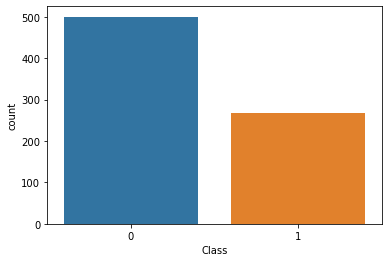

In [82]:
sns.countplot(data=df , x='Class')

In [83]:
from sklearn.utils import resample

df_minority= df[df['Class']==1]

df_majority = df[df['Class']==0]

df_minority_upsampled= resample(df_minority,
                               replace=True,
                               n_samples=500,
                               random_state=42)

df_upsampled= pd.concat([df_minority_upsampled , df_majority])

df_upsampled.head()


,Preg,Glucose,BP,skinThick,Insulin,BMI,DPF,Age,Class
269,2,146,0,23,30.5,27.5,0.240,28,1
283,7,161,86,23,30.5,30.4,0.165,47,1
195,5,158,84,41,210.0,39.4,0.395,29,1
535,4,132,0,23,30.5,32.9,0.302,23,1
38,2,90,68,42,30.5,38.2,0.503,27,1


In [92]:
df_upsampled['Class'].value_counts()

1    500
0    500
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

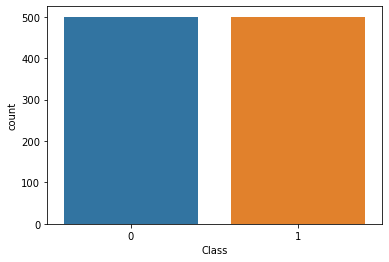

In [93]:
sns.countplot(data=df_upsampled , x='Class')

In [95]:
np.random.seed(42)


X= df_upsampled.drop('Class' , axis= 1)
y= df_upsampled['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


classifier = RandomForestClassifier(n_estimators=160,
                                    bootstrap=True,
                                    max_depth=None,
                                    max_features='log2',
                                    oob_score=False)

classifier.fit(X_train,y_train)


predictions= classifier.predict(X_test)

print(f'Accuracy score is: {accuracy_score(y_test , predictions) *100: .2f}%')

print(classification_report(y_test, predictions))


Accuracy score is:  90.00%
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       104
           1       0.85      0.96      0.90        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200



<AxesSubplot:>

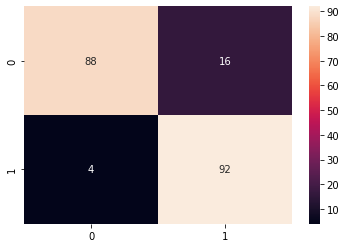

In [98]:
sns.heatmap(confusion_matrix(y_test , predictions) , annot=True)

### Dimensionality Reduction using PCA 

Accuracy score is:  82.50%

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       104
           1       0.76      0.94      0.84        96

    accuracy                           0.82       200
   macro avg       0.84      0.83      0.82       200
weighted avg       0.84      0.82      0.82       200



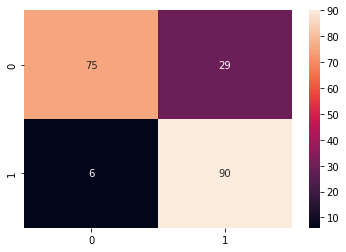

In [103]:
np.random.seed(42)

from sklearn.decomposition import PCA



X= df_upsampled.drop('Class' , axis= 1)
y= df_upsampled['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)



pca_model = PCA(n_components= 2)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)


classifier = RandomForestClassifier(n_estimators=160,
                                    bootstrap=True,
                                    max_depth=None,
                                    max_features='log2',
                                    oob_score=False)

classifier.fit(X_train_pca , y_train)


predictions= classifier.predict(X_test_pca)

print(f'Accuracy score is: {accuracy_score(y_test , predictions) *100: .2f}%')

print('')

print(classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test , predictions) , annot=True);

### Using two principal components analysis gave 82.50% accuracy

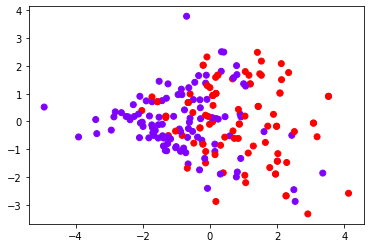

In [106]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c= y_test, cmap='rainbow' )
plt.show()